In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import os
data_directory = '/mnt/c/Repositories/cannon-curtis-spencer-tyler-acme/vol-3/Data'
os.chdir(data_directory)

In [2]:
def plot_time_signals(data,fs,plotname):
    time_axis = np.arange(len(data))/fs
    plt.figure(figsize=(20,5))
    for i in range(data.shape[1]):
        plt.subplot(2,4,i+1)
        # plt.plot(time_axis,data[:,i])
        plt.plot(time_axis[:1000],data[:1000,i]) #I only plotted 1/10 of the data so it actually looked like something
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage')
        plt.title(f"Mic {i+1}")
        # plt.suptitle("Microphone Data (Time Domain)")
        plt.suptitle(f'Mic Data ({plotname})')
        plt.tight_layout()
    plt.show()
def plot_mic_positions(pos_data):
    #Simply plots the microphone positions
    plt.plot(pos_data[:,0],pos_data[:,1],'o')
    plt.xlabel('x pos (m)')
    plt.ylabel('y pos (m)')
    plt.title('Microphone Positions')
    plt.show()

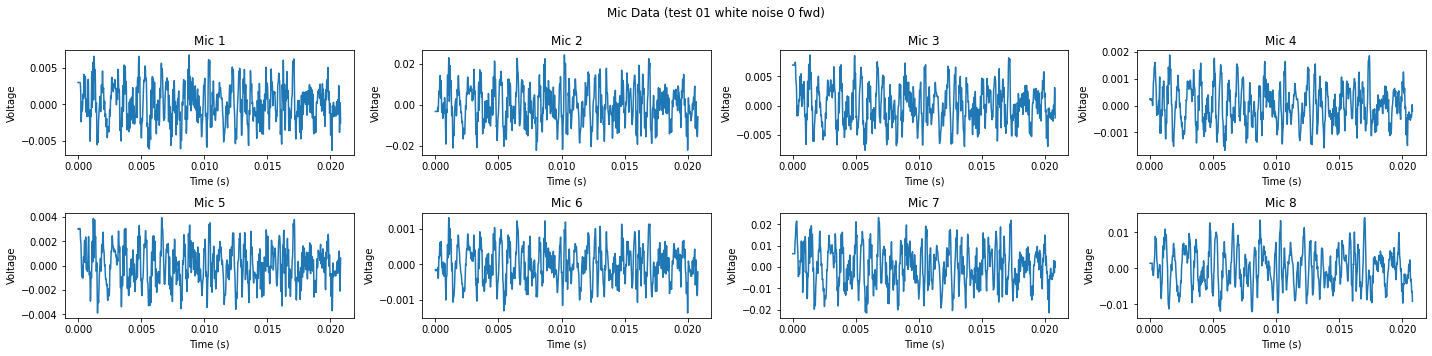

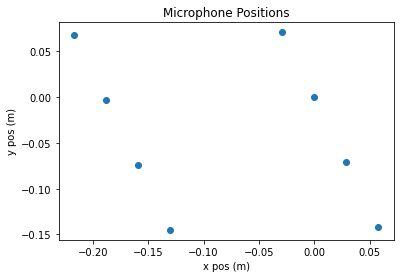

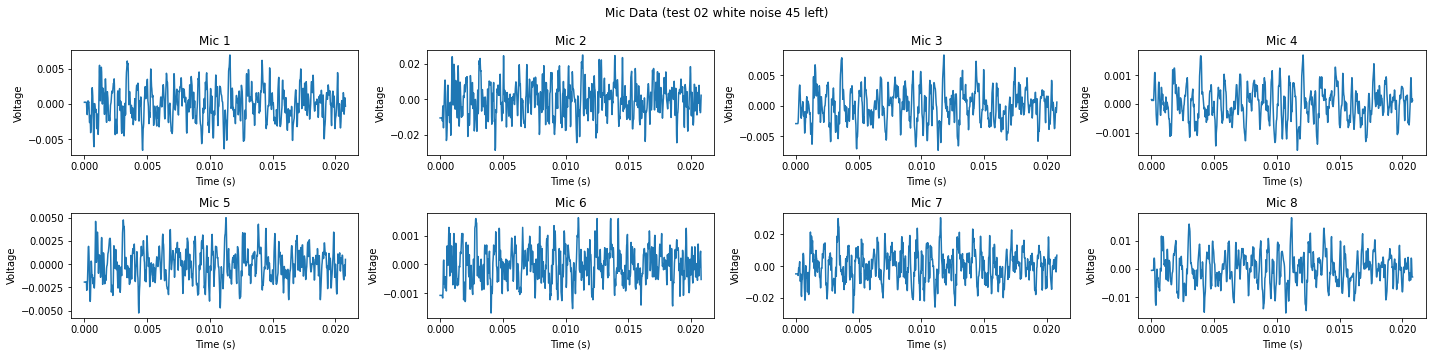

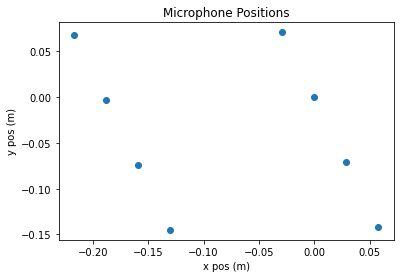

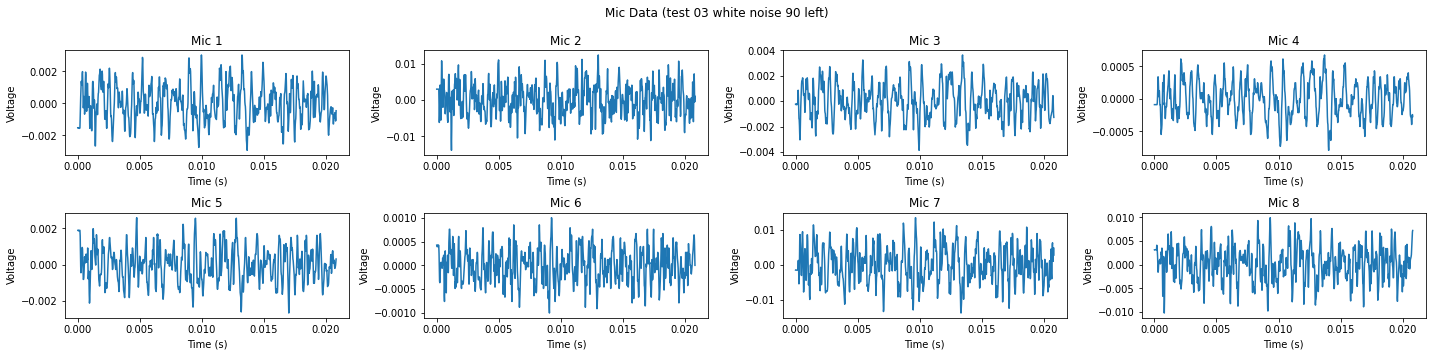

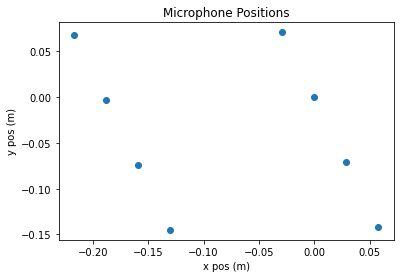

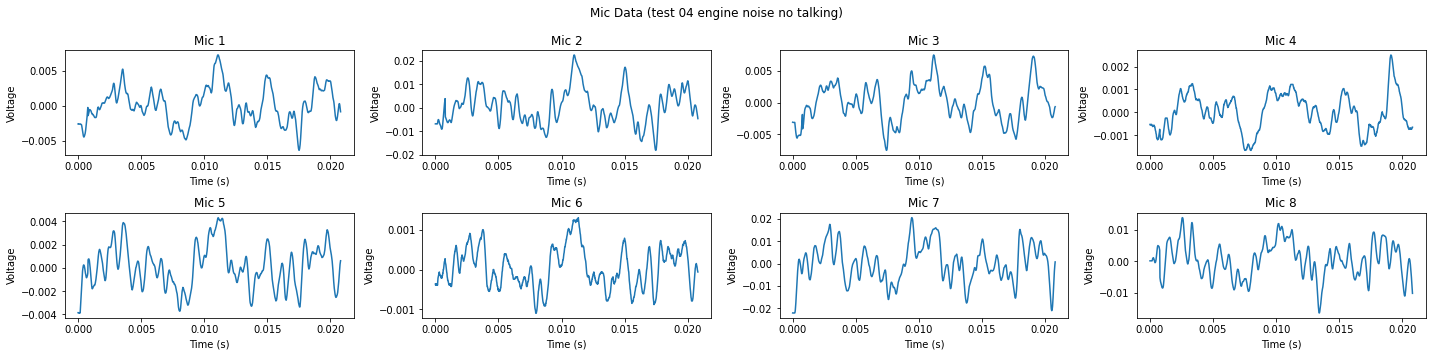

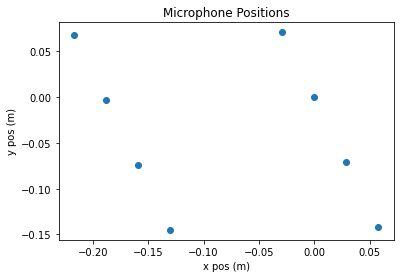

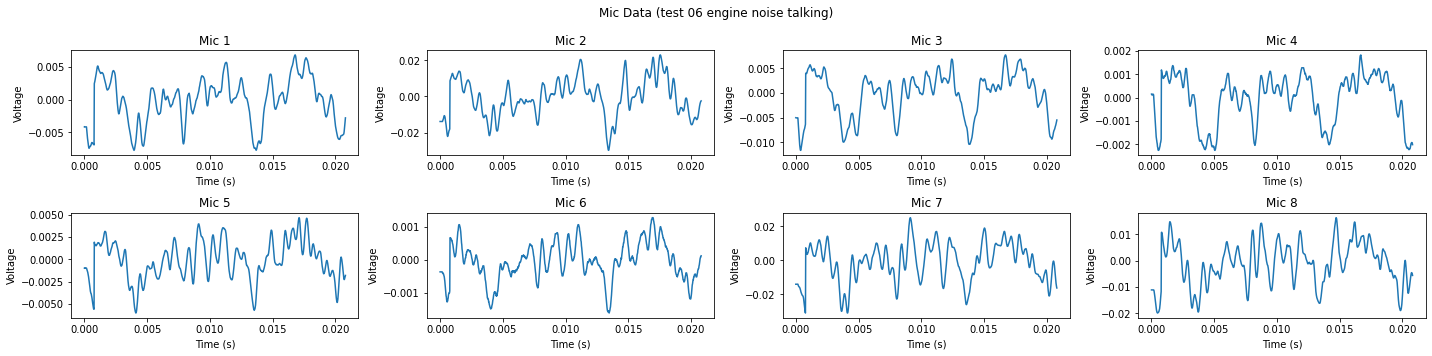

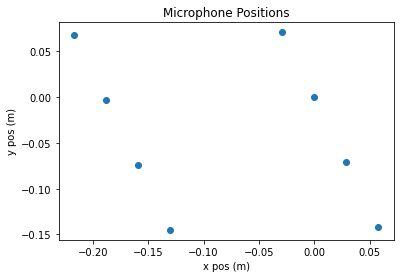

Time Data Sample: [[-4.15039062e-03 -1.38549805e-02 -5.03540039e-03  1.52587891e-04
  -9.76562500e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.18090820e-03 -1.38854980e-02 -5.06591797e-03  1.22070312e-04
  -9.46044922e-04 -3.66210938e-04 -1.41601562e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38549805e-02 -5.06591797e-03  1.22070312e-04
  -9.76562500e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38549805e-02 -5.06591797e-03  1.22070312e-04
  -9.76562500e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38244629e-02 -5.06591797e-03  1.22070312e-04
  -9.46044922e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38854980e-02 -5.03540039e-03  1.52587891e-04
  -9.76562500e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38244629e-02 -5.06591797e-03  1.52587891e-04
  -9.76562500e-04 -3.66210938e-04 -1.41296387e-02 -1.11389160e-02]
 [-4.15039062e-03 -1.38549805e-02 -5.06591797e-03  

In [3]:
#Get names of all .mat files
fnames = os.listdir()
fnames = [f for f in fnames if f[-4:]=='.mat']

#Read it in as data
for file in fnames:
    try:
        #Read in .mat file as a dictionary using scipy io
        data = loadmat(file)
        #Get relevant data
        time_data = data['data']
        pos_data = data['micPositions']
        fs = data['fs'][0][0]
        # label = data['label'] #There should be a "label" dictionary key but I wasn't getting it to work. Might be a quirk of reading in matlab's .mat files
        
        #Plot the time signal and the mic positions
        plotname = file.replace('_',' ')
        plotname = plotname[:-4]
        plot_time_signals(time_data,fs,plotname)
        plot_mic_positions(pos_data)
    except KeyError:
        print("Invalid Key")
print("Time Data Sample:",time_data[:100])

Testing/Validation
* Data is constantly collected on this project. When we need to validate on new data, we'll be able to ask for new data from the project
* There are no datasets with angle of arrival precisely known. This complicates validation, but the approximate path is known so we will be able to validate
\
Notes:
* The time data looks to be in the expected range of mV
* The plots look like expected microphone data for the various noise scenarios

Future Data Collection/Requests:
* We will request data with a moving sound source as well as data of someone talking without noise in the background.

Future work:
* The normal Kalman filter may not be the ideal tool for this situation, as angles are distributed along a circle [0,2π] instead of the whole real line like the normal distribution and in turn the Kalman filter assumes. We need to investigate how to deal with doing arithmetic around the circle, as well as exploring adjusting the Kalman filter to work with "circular" normal distributions instead of the standard normal
* We also need to investigate different algorithms for calculated direction of arrival, including using GCC and GCCPHAT methods of angle calculation
* We want to find the best way to predict the actual measured angle of arrival since current methods predict 2 angles for each mic pair based on a line of symmetry. This may be a simple circular mean, or by using a Bayesian update.
* We also want to investigate if there's a robust way to predict whether or not there is a source present in order to know whether we should perform prediction + update or only preform prediction at a given update
* We need to investigate using a state evolution based on angular velocity, and how it performs against estimating the state evolution equations with methods discussed in class.
* We might also need to use a particle filter or unscented Kalman filter instead of the standard filter. We will explore alternative algorithms for use in the project.